# U2AF2
U2AF65 is an essential pre-mRNA splicing factor that guides the early stages of splice-site choice by recognizing polypyrimidine tract consensus sequences near the 3-prime splice site.
[developmental delay, dysmorphic facies, and brain anomalies (DEVDFB](https://omim.org/entry/620535) is caused by heterozygous mutation in the U2AF2 gene.
U2 is a small nuclear ribonucleoproteins (snRNPs). U2 auxiliary factor (U2AF) is a heterodimer that includes U2AF65 and U2AF35 and contributes to binding U2 snRNP to the pre-mRNA branch site. The U2AF2 gene encodes the large subunit U2AF65, it is an indispensable splicing factor in the early step of spliceosome assembly

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


## U2AF2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for U2AF2.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'U2AF2'
mane_tx_id = 'NM_007279.3'
mane_protein_id = "NP_009210.1" # splicing factor U2AF 65 kDa subunit isoform a
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24' 
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
   phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 48/48 [00:03<00:00, 15.90 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
46,Global developmental delay
41,Delayed gross motor development
41,Delayed speech and language development
26,Hypotonia
26,Short palpebral fissure
25,Downslanted palpebral fissures
24,Prominent forehead
23,Feeding difficulties
22,Seizure
21,Wide nasal bridge


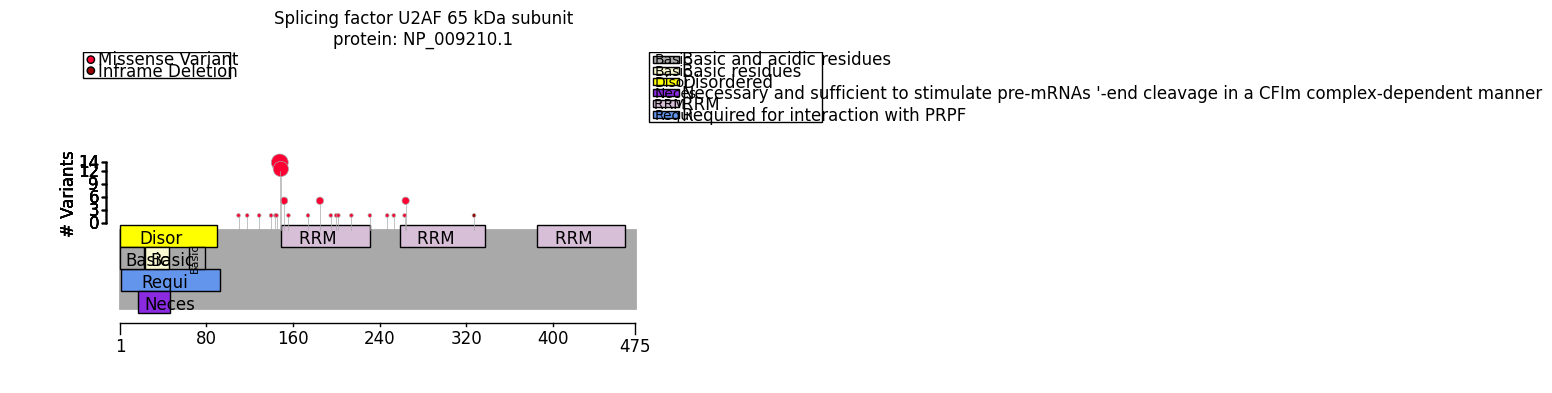

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

u2af2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
u2af2_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
0,Disordered,Region,2 - 90,
0,Basic and acidic residues,Compositional bias,2 - 23,
0,Required for interaction with PRPF19,Region,3 - 93,
0,Necessary and sufficient to stimulate pre-mRNAs 3'-end cleavage in a CFIm complex-dependent manner,Region,18 - 47,
0,Basic residues,Compositional bias,25 - 46,
0,Basic and acidic residues,Compositional bias,65 - 79,
21,RRM 1,Domain,150 - 231,p.Arg150Cys; p.Val186Met; p.Asp215Gly; p.Val153Met; p.Glu201Asp; p.Pro157Leu; p.Asn196Thr; p.Arg203Cys; p.Leu175Pro; p.Arg150His
4,RRM 2,Domain,260 - 337,p.Gly264Glu; p.Gly265Asp; p.Lys329del
0,RRM 3,Domain,386 - 466,


In [7]:
from gpsea.view import CohortVariantViewer
cvv = CohortVariantViewer(tx_id=mane_tx_id)
cvv.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
12,19_55661148_55661148_C_T,c.445C>T (p.Arg149Trp),5,missense
7,19_55661151_55661151_C_T,c.448C>T (p.Arg150Cys),5,missense
4,19_55661152_55661152_G_A,c.449G>A (p.Arg150His),5,missense
2,19_55661160_55661160_G_A,c.457G>A (p.Val153Met),5,missense
2,19_55662571_55662571_G_A,c.556G>A (p.Val186Met),6,missense
2,19_55668558_55668558_G_A,c.794G>A (p.Gly265Asp),8,missense
2,19_55661149_55661149_G_A,c.446G>A (p.Arg149Gln),5,missense
1,19_55668555_55668555_G_A,c.791G>A (p.Gly264Glu),8,missense
1,19_55668525_55668525_T_C,c.761T>C (p.Val254Ala),8,missense
1,19_55663646_55663646_A_G,c.644A>G (p.Asp215Gly),7,missense


# Genotype Phenotype Correlation (GPC) Analysis

Residues 149-150 are one of the relative hotspots of pathogenic variation in U2AF2.

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.analysis.predicate import variant_key, anyof
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

r149w = variant_key(key="19_55661148_55661148_C_T") # c.445C>T	p.Arg149Trp	
r150c = variant_key(key="19_55661151_55661151_C_T") # c.448C>T	p.Arg150Cys	
r150h = variant_key(key="19_55661152_55661152_G_A") # c.449G>A	p.Arg150His
var_149_150 = anyof((r149w, r150c, r150h))

var_149_150_predicate = monoallelic_classifier(a_predicate=r149w, 
                                   b_predicate=~r149w, 
                                   a_label="R149,R150 variants",
                                   b_label="other",
                                   )

var_149_150_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=var_149_150_predicate,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(var_149_150_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,130
HMF03,Skipping term because of a child term with the same individual counts,8
HMF08,Skipping general term,78
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,236


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=var_149_150_result)

Allele group,"R149,R150 variants",other,Corrected p values,p values
Deeply set eye [HP:0000490],10/10 (100%),10/29 (34%),0.020488,0.000436
Preauricular pit [HP:0004467],4/10 (40%),1/33 (3%),0.147981,0.007461
Ptosis [HP:0000508],8/12 (67%),7/34 (21%),0.147981,0.009446
Hypertelorism [HP:0000316],6/11 (55%),4/29 (14%),0.169769,0.014448
Wide intermamillary distance [HP:0006610],4/7 (57%),4/29 (14%),0.244656,0.030102
Short neck [HP:0000470],8/11 (73%),10/32 (31%),0.244656,0.031233
Brachydactyly [HP:0001156],4/10 (40%),3/31 (10%),0.318889,0.047494
"Intellectual disability, moderate [HP:0002342]",4/9 (44%),3/23 (13%),0.448572,0.076353
Narrow nasal bridge [HP:0000446],6/11 (55%),8/33 (24%),0.678947,0.131739
Short chin [HP:0000331],6/11 (55%),9/33 (27%),0.678947,0.144457


In [11]:
r149w_clf = monoallelic_classifier(
    a_predicate=r149w,
    b_predicate=~r149w,
    a_label="r149W",
    b_label="other"
)
r149w_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r149w_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=r149w_result)

Allele group,r149W,other,Corrected p values,p values
Deeply set eye [HP:0000490],10/10 (100%),10/29 (34%),0.020488,0.000436
Preauricular pit [HP:0004467],4/10 (40%),1/33 (3%),0.147981,0.007461
Ptosis [HP:0000508],8/12 (67%),7/34 (21%),0.147981,0.009446
Hypertelorism [HP:0000316],6/11 (55%),4/29 (14%),0.169769,0.014448
Wide intermamillary distance [HP:0006610],4/7 (57%),4/29 (14%),0.244656,0.030102
Short neck [HP:0000470],8/11 (73%),10/32 (31%),0.244656,0.031233
Brachydactyly [HP:0001156],4/10 (40%),3/31 (10%),0.318889,0.047494
"Intellectual disability, moderate [HP:0002342]",4/9 (44%),3/23 (13%),0.448572,0.076353
Narrow nasal bridge [HP:0000446],6/11 (55%),8/33 (24%),0.678947,0.131739
Short chin [HP:0000331],6/11 (55%),9/33 (27%),0.678947,0.144457


In [12]:
from gpsea.analysis.predicate import protein_feature

# RRM 1	DOMAIN	
rrm1 = protein_feature(feature_id="RRM 1", protein_metadata=protein_meta)
rrm1_predicate = monoallelic_classifier(
    a_predicate=rrm1,
    b_predicate=~rrm1,
    a_label="RRM 1",
    b_label="other"
)
rrm1_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=rrm1_predicate,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=rrm1_result)

Allele group,RRM 1,other,Corrected p values,p values
Deeply set eye [HP:0000490],5/17 (29%),15/22 (68%),1.0,0.024842
Ptosis [HP:0000508],4/21 (19%),11/25 (44%),1.0,0.114755
Delayed gross motor development [HP:0002194],16/18 (89%),25/25 (100%),1.0,0.169435
Hypotonia [HP:0001252],13/17 (76%),13/23 (57%),1.0,0.315174
Wide nasal bridge [HP:0000431],11/19 (58%),10/25 (40%),1.0,0.361424
Short neck [HP:0000470],6/18 (33%),12/25 (48%),1.0,0.368439
"Intellectual disability, mild [HP:0001256]",7/13 (54%),7/19 (37%),1.0,0.472697
Short chin [HP:0000331],5/19 (26%),10/25 (40%),1.0,0.521867
Downslanted palpebral fissures [HP:0000494],10/20 (50%),15/25 (60%),1.0,0.557160
Abnormal lip morphology [HP:0000159],10/10 (100%),16/16 (100%),1.0,1.000000


In [13]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Feeding difficulties [HP:0011968],9/24 (38%),14/18 (78%),0.545913,0.013315
Short chin [HP:0000331],11/25 (44%),4/19 (21%),1.000000,0.198519
Downslanted palpebral fissures [HP:0000494],12/26 (46%),13/19 (68%),1.000000,0.224439
High anterior hairline [HP:0009890],8/24 (33%),9/18 (50%),1.000000,0.348284
Micrognathia [HP:0000347],7/25 (28%),8/19 (42%),1.000000,0.356546
Short palpebral fissure [HP:0012745],13/25 (52%),13/19 (68%),1.000000,0.358557
Wide nasal bridge [HP:0000431],10/25 (40%),11/19 (58%),1.000000,0.361424
Deeply set eye [HP:0000490],9/20 (45%),11/19 (58%),1.000000,0.527254
"Intellectual disability, mild [HP:0001256]",8/16 (50%),6/16 (38%),1.000000,0.722393
Hypotonia [HP:0001252],15/22 (68%),11/18 (61%),1.000000,0.744205


# Summary

In [14]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

ft_results = (
    GPAnalysisResultSummary.from_multi(
        result=r149w_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=var_149_150_result
    ),
     GPAnalysisResultSummary.from_mono(
        result=rrm1_result
    )
    ,
     GPAnalysisResultSummary.from_mono(
        result=mf_result
    )
)

caption = "No statistical analysis of GPCs in U2AF2 identified in published literature."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=ft_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [15]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [16]:
summarizer.process_latex(report=report, protein_fig=u2af2_fig)

Figure saved to ../../supplement/img/U2AF2_protein_diagram-draft.pdf
Output to ../../supplement/tex/U2AF2_summary_draft.tex
